1. Considere la figura 6.1, tome una ecuación determinada, por ejemplo una raíz cuadrada o
cúbica, o un seno, genere un data set con muchos valores. Con base en ese data set y utilizando
una herramienta de ML, encuentre un modelo para el cálculo de la raíz cuadrada. Úselo con 10
ejemplos y compare los resultados con los que da la función del lenguaje.

# Regresión Lineal con NumPy y Scikit-Learn

Este repositorio contiene un ejemplo básico de regresión lineal implementado con NumPy y Scikit-Learn. El modelo se entrena y evalúa utilizando datos generados aleatoriamente.

## Datos de Entrada

Se generan datos de entrada (`X`) de forma aleatoria utilizando NumPy, y se calculan los valores de salida correspondientes (`y`) como la raíz cuadrada de los valores de entrada.

## División en Conjuntos de Entrenamiento y Prueba

Los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de Scikit-Learn.

## Modelo de Regresión Lineal

Se utiliza la regresión lineal de Scikit-Learn para crear y entrenar el modelo.

```python
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)
```

Evaluación del Modelo

El modelo entrenado se evalúa en el conjunto de prueba, y se calcula el error cuadrático medio (MSE).


In [1]:
import numpy as np

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = np.sqrt(X)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)         

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
for elem in zip(y_test, y_pred):
    print(elem)

(array([2.6314865]), array([2.59811331]))
(array([1.01017232]), array([1.05831973]))
(array([3.12483514]), array([3.33873267]))
(array([2.58966768]), array([2.5411711]))
(array([2.58218263]), array([2.5310754]))
(array([2.61116889]), array([2.5703341]))
(array([2.14820707]), array([1.99570018]))
(array([1.78320829]), array([1.62147206]))
(array([2.8137609]), array([2.85695806]))
(array([2.3426769]), array([2.22346158]))
(array([2.78954611]), array([2.82157291]))
(array([1.62651656]), array([1.48213666]))
(array([2.45936073]), array([2.3695892]))
(array([2.38418529]), array([2.27463034]))
(array([1.78485]), array([1.62299972]))
(array([2.05828764]), array([1.89705634]))
(array([1.68168654]), array([1.52973492]))
(array([1.09634192]), array([1.10565824]))
(array([2.38336854]), array([2.27361485]))
(array([2.78250551]), array([2.81134183]))


In [5]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")


Error cuadrático medio: 0.01


2. Los archivos que acompañan MEP incluyen conjuntos de entrenamiento para varios
ejemplos, tome uno de los ejemplos y utilice ese data set para generar un modelo.

# Red neuronal para la clasificación del conjunto de datos Iris

Este repositorio contiene una implementación simple de una red neuronal utilizando Keras para clasificar el conjunto de datos Iris. El conjunto de datos Iris es conocido en el ámbito del aprendizaje automático y se utiliza comúnmente para tareas de clasificación.

## Conjunto de datos

El conjunto de datos Iris (`Iris.csv`) se carga utilizando Pandas y contiene características de las flores de iris junto con sus etiquetas correspondientes.

## Requisitos

Asegúrate de tener las siguientes dependencias instaladas:

- pandas
- scikit-learn
- keras

Puedes instalarlas utilizando:

```bash
pip install pandas scikit-learn keras
```

## Arquitectura de la Red Neuronal

- Capa de entrada: 4 neuronas (características del conjunto de datos Iris)
- Capa oculta: 8 neuronas, activación ReLU
- Capa de salida: 3 neuronas (para las tres clases), activación softmax

## Entrenamiento

El modelo se entrena durante 50 épocas con un tamaño de lote de 10. La precisión del entrenamiento y la validación se monitorean durante el entrenamiento.

## Evaluación

El modelo entrenado se evalúa en el conjunto de prueba y se imprimen la pérdida y la precisión en el conjunto de prueba.

Siéntete libre de modificar el código, la arquitectura o los hiperparámetros según tus requisitos específicos.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the Iris dataset from CSV
iris_data = pd.read_csv('Iris.csv', sep=' ',  dtype=float)

In [17]:
# Extract features (characteristics) and target
X = iris_data.iloc[:, :4].values
y = iris_data.iloc[:, 4].values

# Encode target values (0, 1, 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode the target variable
y_one_hot = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9834 - accuracy: 0.5126 - val_loss: 0.8999 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9446 - accuracy: 0.5126 - val_loss: 0.8643 - val_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9080 - accuracy: 0.5546 - val_loss: 0.8311 - val_accuracy: 0.5667
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8740 - accuracy: 0.5882 - val_loss: 0.7990 - val_accuracy: 0.5333
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.5966 - val_loss: 0.7695 - val_accuracy: 0.5667
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8088 - accuracy: 0.5882 - val_loss: 0.7396 - val_accuracy: 0.6667
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7772 - accuracy: 0.6218 - val_loss: 0.7117 - val_accuracy: 0.6667
Epoch 8/50
12/12 [=

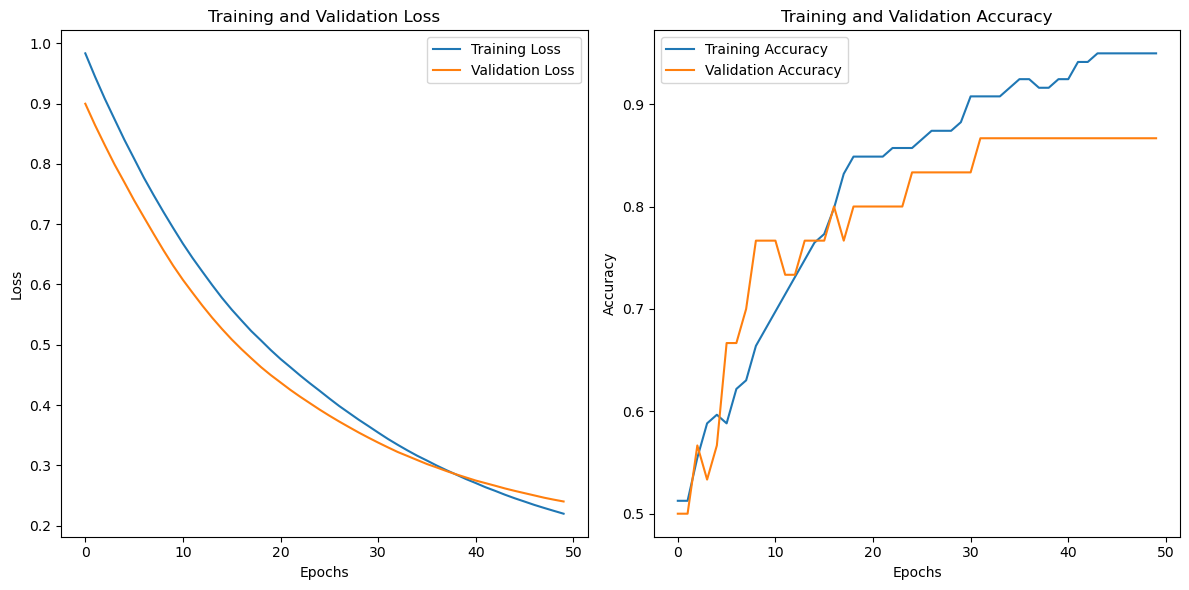

1/1 [==============================] - 0s 35ms/step - loss: 0.2401 - accuracy: 0.8667
Test Loss: 0.24006730318069458, Test Accuracy: 0.8666666746139526
1/1 [==============================] - 0s 72ms/step


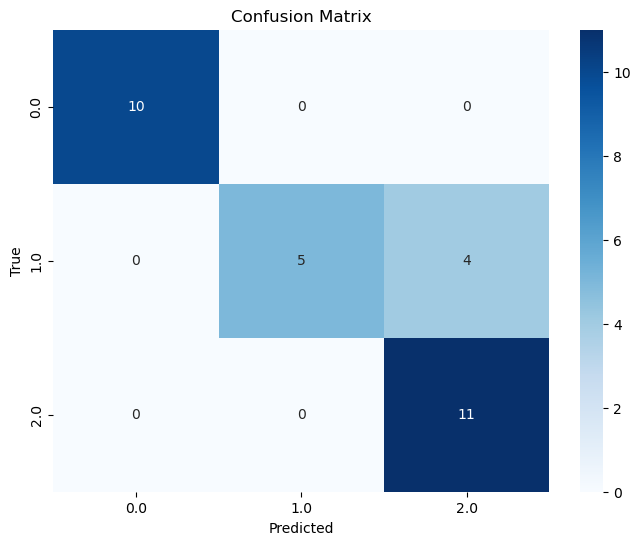

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = [round(pred.argmax()) for pred in y_pred]
y_true = [round(true.argmax()) for true in y_test]

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3. Estudie uno de los programas entregados y con base en el haga cambios significativos para
otra aplicación.

4. Desarrolle un problema de su escogencia.